<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans



In [2]:
# On charge le dataset iris :
iris = datasets.load_iris()

# On extrait X :
X = iris.data

# On peut le transformer en DataFrame :
X = pd.DataFrame(X)

# Cela permet d'appliquer la méthode .head :
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Une liste vide pour enregistrer les inerties :
intertia_list = [ ]

# Notre liste de nombres de clusters :
k_list = range(1, 10)

# Pour chaque nombre de clusters :
for k in k_list :

    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k, n_init=42)

    # On entraine
    kmeans.fit(X)

    # On enregistre l'inertie obtenue :
    intertia_list.append(kmeans.inertia_)

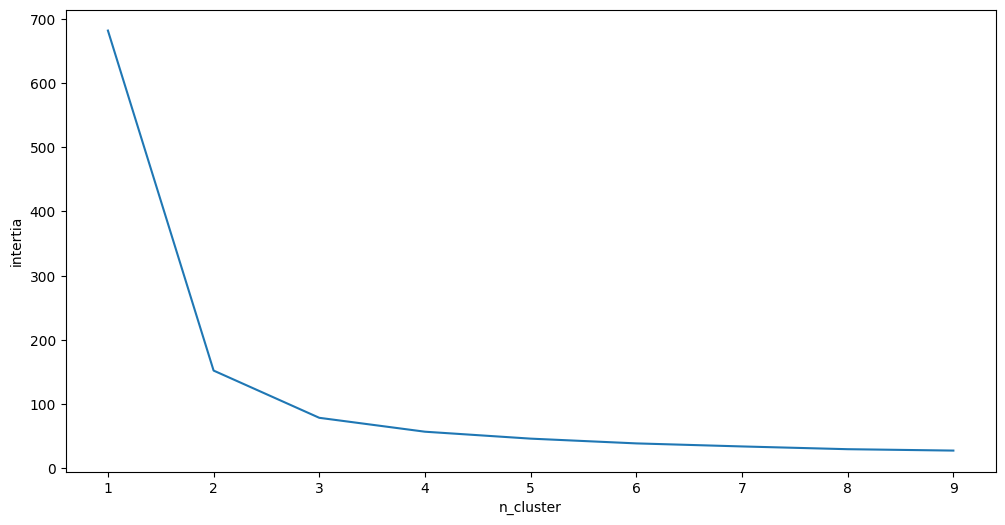

In [4]:
# On affiche les resultats de la liste d'inerties pour trouver le coude
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [5]:
# On selectionne 3 qui semble être le bon compromis
kmeans = KMeans(n_clusters=3, n_init=42)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=42)

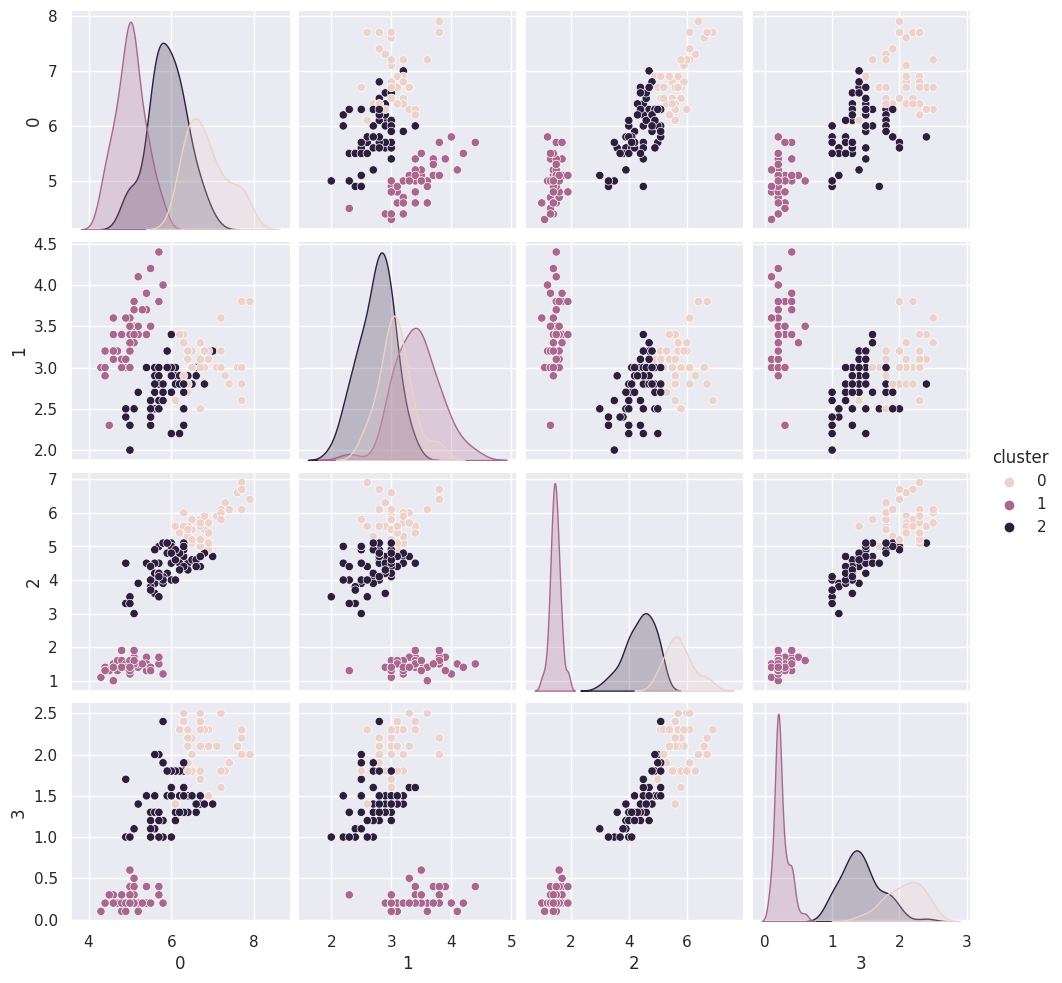

In [6]:
# On ajoute les labels a X
X["cluster"] = kmeans.labels_

# On affiche le graph des clusters
sns.set()
sns.pairplot(X, hue="cluster")